In [ ]:
pip install mtcnn

In [1]:
pip show mtcnn


Name: mtcnn
Version: 0.1.0
Summary: Multi-task Cascaded Convolutional Neural Networks for Face Detection, based on TensorFlow
Home-page: http://github.com/ipazc/mtcnn
Author: Iván de Paz Centeno
Author-email: ipazc@unileon.es
License: MIT
Location: c:\python36\lib\site-packages
Requires: keras, opencv-python
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [1]:
# Load the required libraries
import mtcnn
from mtcnn import MTCNN
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Circle

Using TensorFlow backend.
c:\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as

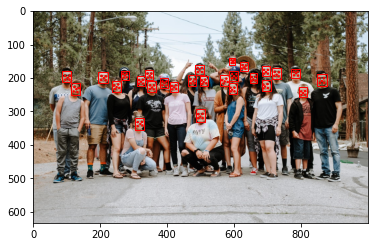

In [2]:
# 1. Face detection in Image deep learning based using mtcnn

# draw an image with detected objects function

def detect_raw_image_with_boxes(filename, result_list):
    # load the image
    data = plt.imread(filename)
    
    # plot the image
    plt.imshow(data)
    
    # get the context for drawing boxes
    ax = plt.gca()
    
    # Plot each box
    for result in result_list:
        x, y, width, height = result["box"]
        
        # Create the shape
        rect = Rectangle((x,y),width, height, fill = False, color = 'red')
        
        # draw the box
        ax.add_patch(rect)
        
        # Create a circle on keypoints or landmark
        for key, value in result['keypoints'].items():
            dot = Circle(value, radius = 2, color = 'red')
            ax.add_patch(dot)
        
    # Show the plot
    plt.show
        
# Load the image data to a file

filename = "test1.jpg"

# Load th image data from a file
pixels = plt.imread(filename)

# Creat the detector using default weights
detector = MTCNN()

# detect faces in the image 
faces = detector.detect_faces(pixels)
detect_raw_image_with_boxes(filename, faces)


In [3]:
# 2 Real time Face detection deep learning-based using mtcnn

# Load the required libraries
import mtcnn
from mtcnn import MTCNN
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Circle
import cv2

classifier = MTCNN()

cap = cv2.VideoCapture(0)
#cap.release()


while(True):
    
    # Read the frame
    _, image = cap.read()
    
    # Convert to Gray scale
   # pixel = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    bboxes = classifier.detect_faces(image)
   
    for box in bboxes:
    
        #extract
        x, y, width, height = box["box"]           # box = [x,y,width,height]
        x2, y2 = x + width, y + height
    
        # Draw a rectangle over the pixel
        cv2.rectangle(image, (x, y), (x2, y2), (0,0,255), 1)
        cv2.putText(image, 'Face', (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
        for key, value in box['keypoints'].items():
            
            cv2.circle(image, value, 2, (0,0,255), (5))
             
    # Show the image
    cv2.imshow("Face Detection",image)
        
    # Stop if escape key is pressed
    k = cv2.waitKey(30) & 0xff
    if k==27:
        break

# Release the VideoCapture object
cap.release()
